('Station West', 'Entry Signal West', {'occupied': False})
('Entry Signal West', 'Point 1', {'occupied': False})
('Point 1', 'Exit Signal West 1', {'occupied': True, 'want': True})
('Point 1', 'Exit Signal West 2', {'occupied': False})
('Exit Signal West 1', 'Exit Signal East 1', {'occupied': True, 'want': True})
('Exit Signal West 2', 'Exit Signal East 2', {'occupied': False})
('Exit Signal East 1', 'Point 2', {'occupied': True, 'want': True})
('Exit Signal East 2', 'Point 2', {'occupied': False})
('Point 2', 'Entry Signal East', {'occupied': False})
('Entry Signal East', 'Station East', {'occupied': False})


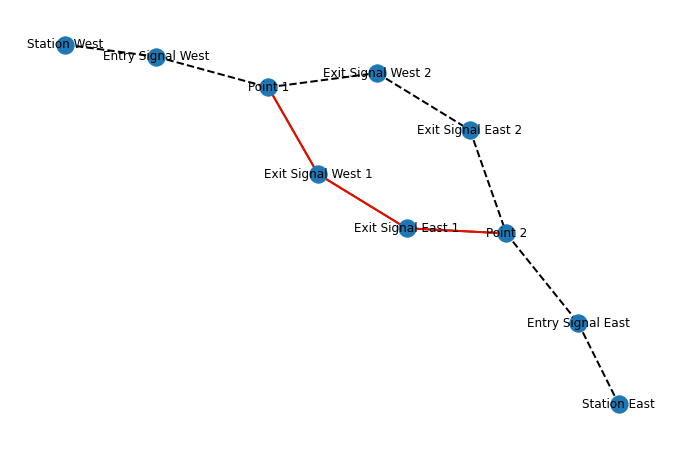

In [1]:
import pylab as plt
import networkx as nx
import json

json_string = """
{
    "station_graph": [
        {"start": "Station West", "end": "Entry Signal West" },
        {"start": "Entry Signal West", "end": "Point 1" },
        {"start": "Point 1", "end": "Exit Signal West 1" },
        {"start": "Point 1", "end": "Exit Signal West 2" },
        {"start": "Exit Signal West 1", "end": "Exit Signal East 1" },
        {"start": "Exit Signal West 2", "end": "Exit Signal East 2" },
        {"start": "Exit Signal East 1", "end": "Point 2" },
        {"start": "Exit Signal East 2", "end": "Point 2" },
        {"start": "Point 2", "end": "Entry Signal East" },
        {"start": "Entry Signal East", "end": "Station East" }
    ],
    "routes": [
        {"start": "Entry Signal West", "end": "Exit Signal East 1", "occupied": false },
        {"start": "Entry Signal West", "end": "Exit Signal East 2", "occupied": false },
        {"start": "Exit Signal East 1", "end": "Station East", "occupied": false },
        {"start": "Exit Signal East 2", "end": "Station East", "occupied": false },
        {"start": "Entry Signal East", "end": "Exit Signal West 1", "occupied": false },
        {"start": "Entry Signal East", "end": "Exit Signal West 2", "occupied": false },
        {"start": "Point 1", "end": "Point 2", "occupied": true },
        {"start": "Exit Signal West 2", "end": "Station West", "occupied": false }
    ],
    "check_route": {"start": "Point 1", "end": "Point 2" }
}
"""
# Define the JSON data
data = json.loads(json_string)


# Create a directed graph
G = nx.Graph()

# Add station graph edges
for edge in data["station_graph"]:
    G.add_edge(edge["start"], edge["end"])

# You can also add attributes to edges based on the "routes" data
for route in data["routes"]:
    if route["occupied"]:
        start_node = route["start"]
        end_node = route["end"]
        nodes_to_mark_occupied = nx.shortest_path(G, source=start_node, target=end_node)
        for i in range(len(nodes_to_mark_occupied) - 1):
            start_node = nodes_to_mark_occupied[i]
            end_node = nodes_to_mark_occupied[i + 1]

            if G.has_edge(start_node, end_node):
                G.edges[start_node, end_node]["occupied"] = True
    else:
        start_node = route["start"]
        end_node = route["end"]
        nodes_to_mark_unoccupied = nx.shortest_path(
            G, source=start_node, target=end_node
        )
        for i in range(len(nodes_to_mark_unoccupied) - 1):
            start_node = nodes_to_mark_unoccupied[i]
            end_node = nodes_to_mark_unoccupied[i + 1]

            if G.has_edge(start_node, end_node):
                G.edges[start_node, end_node]["occupied"] = False


nodes_to_be_traversed = nx.shortest_path(
    G, source=data["check_route"]["start"], target=data["check_route"]["end"]
)
for i in range(len(nodes_to_be_traversed) - 1):
    start_node = nodes_to_be_traversed[i]
    end_node = nodes_to_be_traversed[i + 1]

    if G.has_edge(start_node, end_node):
        G.edges[start_node, end_node]["want"] = True

for edge in G.edges(data=True):
    print(edge)


occupied_edges = [
    (edge[0], edge[1]) for edge in G.edges(data=True) if edge[2]["occupied"]
]
unoccupied_edges = [
    (edge[0], edge[1]) for edge in G.edges(data=True) if not edge[2]["occupied"]
]
interested_edges = [
    (edge[0], edge[1]) for edge in G.edges(data=True) if "want" in edge[2]
]


pos = nx.spring_layout(G)
plt.figure(figsize=(12, 8))

# Draw the nodes
nx.draw_networkx_nodes(G, pos)

# Draw unoccupied (normal) edges
nx.draw_networkx_edges(
    G, pos, edgelist=unoccupied_edges, edge_color="black", width=2, style="dashed"
)

nx.draw_networkx_edges(G, pos, edgelist=interested_edges, edge_color="green", width=2)


nx.draw_networkx_edges(G, pos, edgelist=occupied_edges, edge_color="red", width=2)

# nx.draw_networkx_edges(
#     G,
#     pos,
#     edgelist=[edge for edge in interested_edges if edge in occupied_edges],
#     edge_color="orange",
#     width=2,
# )


# Draw the labels
labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels)

plt.axis("off")
plt.show()

In [2]:
for p in nx.all_simple_paths(G, source=start_node, target=end_node):
    print(p)


for o_p in nx.all_simple_paths(
    G, source=data["check_route"]["start"], target=data["check_route"]["end"]
):
    print(o_p)

['Exit Signal East 1', 'Exit Signal West 1', 'Point 1', 'Exit Signal West 2', 'Exit Signal East 2', 'Point 2']
['Exit Signal East 1', 'Point 2']
['Point 1', 'Exit Signal West 1', 'Exit Signal East 1', 'Point 2']
['Point 1', 'Exit Signal West 2', 'Exit Signal East 2', 'Point 2']


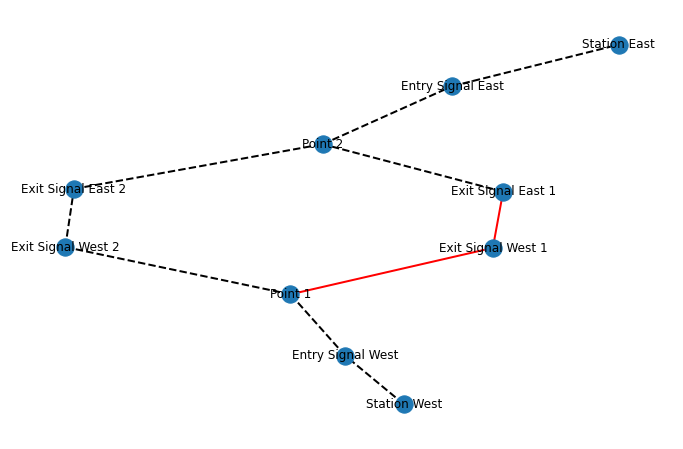

True

In [5]:
from traintrack import TrainTrack

json_string = """
{
    "station_graph": [
        {"start": "Station West", "end": "Entry Signal West" },
        {"start": "Entry Signal West", "end": "Point 1" },
        {"start": "Point 1", "end": "Exit Signal West 1" },
        {"start": "Point 1", "end": "Exit Signal West 2" },
        {"start": "Exit Signal West 1", "end": "Exit Signal East 1" },
        {"start": "Exit Signal West 2", "end": "Exit Signal East 2" },
        {"start": "Exit Signal East 1", "end": "Point 2" },
        {"start": "Exit Signal East 2", "end": "Point 2" },
        {"start": "Point 2", "end": "Entry Signal East" },
        {"start": "Entry Signal East", "end": "Station East" }
    ],
    "routes": [
        {"start": "Entry Signal West", "end": "Exit Signal East 1", "occupied": false },
        {"start": "Entry Signal West", "end": "Exit Signal East 2", "occupied": false },
        {"start": "Exit Signal East 1", "end": "Station East", "occupied": false },
        {"start": "Exit Signal East 2", "end": "Station East", "occupied": false },
        {"start": "Entry Signal East", "end": "Exit Signal West 1", "occupied": false },
        {"start": "Entry Signal East", "end": "Exit Signal West 2", "occupied": false },
        {"start": "Point 1", "end": "Exit Signal East 1", "occupied": true },
        {"start": "Exit Signal West 2", "end": "Station West", "occupied": false }
    ],
    "check_route": {"start": "Exit Signal East 1", "end": "Exit Signal East 1" }
}
"""

t = TrainTrack(json.loads(json_string))
t.plot_graph()
t.is_it_possible_to_travle()

In [6]:
t.plot_ascii_graph()

AttributeError: module networkx has no attribute generate_network_text